# Race History Charts

In [54]:
import fastf1

# Suppress info messages
fastf1.set_log_level('ERROR')

race = fastf1.get_session(2024, 'Bahrain', 'R')
race.load()

In [55]:
race.results

,DriverNumber,BroadcastName,Abbreviation,DriverId,TeamName,TeamColor,TeamId,FirstName,LastName,FullName,...,CountryCode,Position,ClassifiedPosition,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,max_verstappen,Red Bull Racing,3671c6,red_bull,Max,Verstappen,Max Verstappen,...,NED,1.0,1,1.0,NaT,NaT,NaT,0 days 01:31:44.742000,Finished,26.0
11,11,S PEREZ,PER,perez,Red Bull Racing,3671c6,red_bull,Sergio,Perez,Sergio Perez,...,MEX,2.0,2,5.0,NaT,NaT,NaT,0 days 00:00:22.457000,Finished,18.0
55,55,C SAINZ,SAI,sainz,Ferrari,e8002d,ferrari,Carlos,Sainz,Carlos Sainz,...,ESP,3.0,3,4.0,NaT,NaT,NaT,0 days 00:00:25.110000,Finished,15.0
16,16,C LECLERC,LEC,leclerc,Ferrari,e8002d,ferrari,Charles,Leclerc,Charles Leclerc,...,MON,4.0,4,2.0,NaT,NaT,NaT,0 days 00:00:39.669000,Finished,12.0
63,63,G RUSSELL,RUS,russell,Mercedes,27f4d2,mercedes,George,Russell,George Russell,...,GBR,5.0,5,3.0,NaT,NaT,NaT,0 days 00:00:46.788000,Finished,10.0
4,4,L NORRIS,NOR,norris,McLaren,ff8000,mclaren,Lando,Norris,Lando Norris,...,GBR,6.0,6,7.0,NaT,NaT,NaT,0 days 00:00:48.458000,Finished,8.0
44,44,L HAMILTON,HAM,hamilton,Mercedes,27f4d2,mercedes,Lewis,Hamilton,Lewis Hamilton,...,GBR,7.0,7,9.0,NaT,NaT,NaT,0 days 00:00:50.324000,Finished,6.0
81,81,O PIASTRI,PIA,piastri,McLaren,ff8000,mclaren,Oscar,Piastri,Oscar Piastri,...,AUS,8.0,8,8.0,NaT,NaT,NaT,0 days 00:00:56.082000,Finished,4.0
14,14,F ALONSO,ALO,alonso,Aston Martin,229971,aston_martin,Fernando,Alonso,Fernando Alonso,...,ESP,9.0,9,6.0,NaT,NaT,NaT,0 days 00:01:14.887000,Finished,2.0
18,18,L STROLL,STR,stroll,Aston Martin,229971,aston_martin,Lance,Stroll,Lance Stroll,...,CAN,10.0,10,12.0,NaT,NaT,NaT,0 days 00:01:33.216000,Finished,1.0


In [56]:
# Generate lap time based on deltas between Time values
race.laps['AUTO_DIFF']=race.laps.sort_values(by=['Driver','LapNumber']).groupby("Driver")['Time'].diff().fillna(race.laps['LapTime'])
# This completes NaT gaps in LapTime  from pit stops
# We also copy in the LapTime into NaTs
# e.g. to recover the first lap time

In [57]:
race.laps["LEADER_FLAG"] = race.laps['Position']==1
LAST_LAP = race.laps.LapNumber.max()
#WINNER = race.laps.where(race.laps.Position==1).pick_laps(LAST_LAP).Driver.iloc[0]
WINNER = race.results.iloc[0]["Abbreviation"]

In [58]:
#race.laps['LEAD_LAP_NUMBER'] = race.laps.dropna(subset=['LapTime']).sort_values(by=['Time'])['LEADER_FLAG'].cumsum()
race.laps["ELAPSED_TIME"] = race.laps.groupby('Driver')['AUTO_DIFF'].cumsum()
race.laps['LEAD_LAP_NUMBER'] = race.laps.sort_values(by=['ELAPSED_TIME'])['LEADER_FLAG'].cumsum()


In [59]:
#Get the mean laptime for the winner
winner_mean_laptime_s = race.laps.pick_drivers(WINNER)['LapTime'].mean()#.round(decimals=3)
winner_mean_laptime_s


Timedelta('0 days 00:01:36.574421052')

In [68]:
#Calculate the "race history" laptimes
#?? laptimes['LEAD_LAP_NUMBER'] gives track position? laptimes['LAP_NUMBER'] give race history

race.laps.sort_values(by=["ELAPSED_TIME"], ascending=True, inplace=True)
race.laps['RACE_HISTORY_ELAPSED_LAP_TIME'] = (winner_mean_laptime_s * race.laps['LapNumber']) - race.laps['ELAPSED_TIME']
race.laps.head(2)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,AUTO_DIFF,LEADER_FLAG,ELAPSED_TIME,LEAD_LAP_NUMBER,RACE_HISTORY_ELAPSED_LAP_TIME
0,0 days 01:01:37.510000,VER,1,0 days 00:01:37.284000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:41.266000,...,1.0,False,,False,False,0 days 00:01:37.284000,True,0 days 00:01:37.284000,1,-1 days +23:59:59.290421052
171,0 days 01:01:38.497000,LEC,16,0 days 00:01:38.271000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:41.549000,...,2.0,False,,False,False,0 days 00:01:38.271000,False,0 days 00:01:38.271000,1,-1 days +23:59:58.303421052


In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
import fastf1.plotting
driver_colors = fastf1.plotting.get_driver_color_mapping(race)

In [71]:
driver_styles = {}
for driver in driver_colors:
    driver_styles[driver] = fastf1.plotting.get_driver_style(identifier=driver,
                                             style=['linestyle'],
                                             session=race)['linestyle']
    driver_styles[driver] = '' if driver_styles[driver]=='solid' else [6, 2]


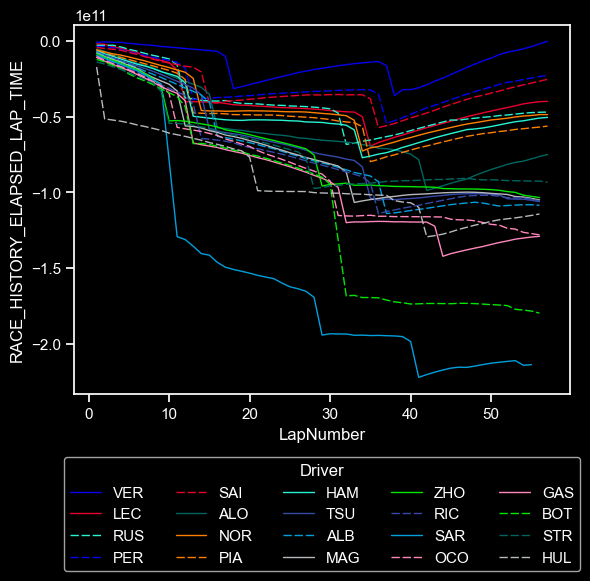

In [72]:
sns.set(style="ticks")
plt.style.use("dark_background")


sns.lineplot(x="LapNumber",
                  y="RACE_HISTORY_ELAPSED_LAP_TIME",
                  units='DriverNumber',
             hue="Driver",
             palette=driver_colors,
             style='Driver',
             dashes=driver_styles,
                  estimator=None, lw=1,
                 data=race.laps.dropna(subset=['LapTime']))
plt.gca().invert_yaxis()
plt.legend(title='Driver', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)


In [73]:

fastf1.plotting.get_driver_style(identifier='VER',
                                             style=['color', 'linestyle'],
                                             session=race)

{'color': '#0600ef', 'linestyle': 'solid'}